'''NAME: Muhammad L. Sawaneh''''                              '''' EMAIL: laminsawaneh@gmail.com''''

''''Course: Machine Learning ''''                               ''''Assignment Number: 1''''

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
# The values in the dataset are string. Numpy can't load them so we have to convert them into float
data = np.loadtxt('linearReg.out')


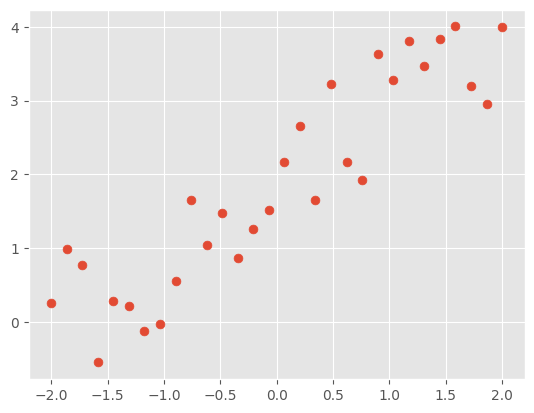

In [29]:
#================================
#Visualizing the data
#================================
x = data[:, 0]
y = data[:,1]
plt.scatter(x, y, s=40)

1. Solve the zeros of the gradient of the loss function, i.e., $\partial_\theta \ell(\theta)=0$, where $\theta=(\theta_0,\theta_1)$

A. You answer here or on the paper

.............................

............................

2. Solve the normal equation, i.e.,
\begin{equation}
X^TX\theta=X^Ty
\end{equation}
- Construct the design matrix, that is,
Construct the design matrix
\begin{equation}
           X=
           \begin{pmatrix}
             1&x_1\\
             1&x_2\\
             1&\vdots\\
             1&x_m
           \end{pmatrix}
\end{equation}

In [30]:
# CONSTRUCT THE DESIGN MATRIX

X = np.array([len(x)*[1],x]).T # code here

In [31]:
# SOLVE THE NORMAL EQUATION

opt_theta_normal = np.linalg.inv(X.T @ X) @ X.T @ y #code here

#print('solution obtained by GD:', opt_w)
print('solution obtained by NE:', opt_theta_normal)

solution obtained by NE: [1.87270208 1.0559765 ]


3. implement gradient desdent
- Compute the cost
\begin{equation}
\ell(\theta) = \frac{1}{2m}\sum^m_{i=1}(\hat{f}(x^{(i)};\theta)-y^{(i)})^2=\frac{1}{2m}\|X\theta-y\|^2_2
\end{equation}
where $\hat{f}(x;\theta)$ is given by linear model
$$
\hat{f}(x;\theta)=\theta_0+\theta_1x=\theta^Tx
$$
- compute the gradient
$$
\partial_\theta\ell(\theta)=\sum^m_{i=1}x^{(i)}_j(\hat{f}(x^{(i)},\theta)-y^{(i)})
$$
or
\begin{equation}
\partial_\theta\ell(\theta)=\frac{1}{m}X^T(X\theta-y)
\end{equation}



In [52]:
def computeCost(X, y, theta):
       """
       Input
        X : design matrix
        y : the responses
        w : initial guess

        Return
        J : the loss evaluated at w
        grad : gradient of the loss evaluated at w

       """
       n_sample = len(y)
       #IMPLEMENT THE LOSS GIVEN IN EQ 1

       loss = np.linalg.norm(X@theta - y)**2*1/(2*n_sample)   #[YOUR CODE HERE]
       # IMPLEMENT THE GRADIENT GIVEN EQ 2

       grad = X.T@(X@theta - y)*1/n_sample #[YOUR CODE HERE]
       return [loss, grad]

# initialize the weight
theta = np.zeros(X.shape[1])
# check your result
print('your loss value is ', computeCost(X, y, theta)[0], '\t', 'the expected value is', 2.7)

your loss value is  2.7120845489549876 	 the expected value is 2.7


- choose a learning rate $\eta=0.02$
- set number of iteration, e.g., 400
- perform the update
$$
    \theta_j\coloneqq \theta_j-\alpha\frac{1}{m}\sum^m_{i=1}x^{(i)}_j(\hat{f}(x^{(i)},\theta)-y^{(i)})
$$
Equivalently,
\begin{equation}
\theta\coloneqq \theta-\alpha\frac{1}{m}X^T(X\theta-y)
\end{equation}

In [33]:
# learning rate
eta = 0.02
# number of iterations
num_iters = 400

In [34]:
def gradientDescent(X, y, theta, eta, num_iters):
    """
    Return
    w : the updated weight
    eval_cost : evaluate the cost function at w

    Inputs:
    X : design matrix of the length of the training examples by the number of features
    y : vector of length size of the length of training examples
    w : weights
    alpha : learning rate
    num_iters : number of iterations
    """
    lossVals = []
    thetaVals = []
    for i in range(num_iters):
        thetaVals.append(theta)
        loss, grad = computeCost(X, y, theta)
        # IMPLEMENT THE UPDATE

        theta =  theta - ((eta/len(y))*X.T@(X@theta - y))  #[YOUR CODE HERE]

        lossVals.append(loss)
    return [theta, lossVals, thetaVals]

In [35]:
#================================
# check minimum value using GD
#===============================
opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta, eta, num_iters)
# Check your result
print('Your result is ', opt_theta_GD, '\t the expected value from Normal equation', opt_theta_normal)

Your result is  [1.87212279 1.0559665 ] 	 the expected value from Normal equation [1.87270208 1.0559765 ]


Text(0.5, 1.0, 'loss vs iteration')

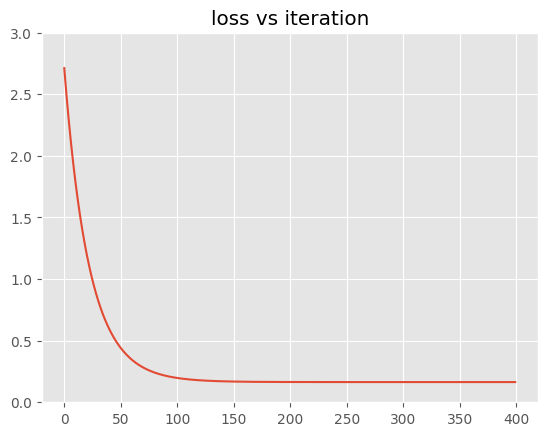

In [36]:
#===============================
# visualizing the loss function
#================================
plt.figure(2)
plt.plot(loss_history)
plt.ylim((0,3))
plt.title('loss vs iteration')

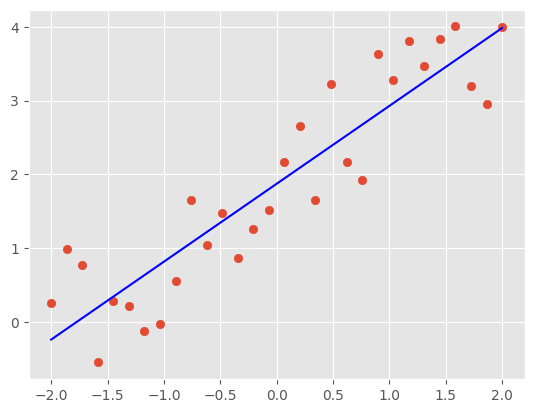

In [37]:
#=======================
#Visualize the model
#=======================
# create data for ploting
xi = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 100)
X_plot = np.c_[np.ones(100), xi]
model = X_plot.dot(opt_theta_normal)
plt.figure(1)
plt.scatter(x, y)
plt.plot(xi, model, 'b')

Using the model obtained, predict for unseen $x=2.5$ and $x=3$

In [38]:
# PREDICTION
unseen_x = np.array(([1, 2.5],[1, 3]))

predict = opt_theta_normal @ unseen_x.T  #YOUR CODE HERE

print('The prediction is', predict)

The prediction is [4.51264332 5.04063157]


Visualizing the loss vs iteration for different learning rates

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
C:\Users\HP\AppData\Local\Temp\ipykernel_13556\915759639.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(loss_history, linewidth=4, label='$\eta=$%0.3f'%eta)


(0.0, 4.0)

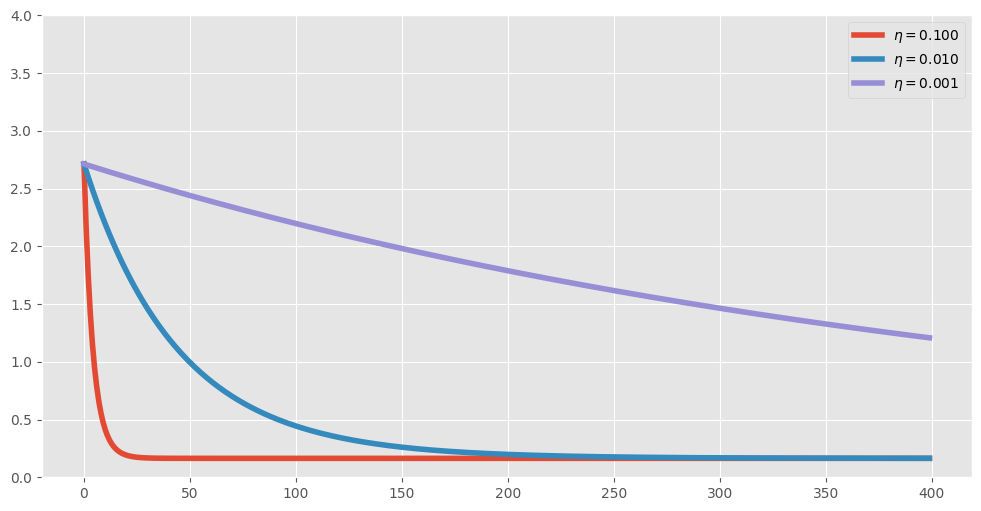

In [39]:
theta_list = [0.1,0.01,0.001]
fig = plt.figure(figsize=(12,6))
for eta in theta_list:
    theta1 = np.zeros(X.shape[1])
    opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta1, eta, num_iters)
    plt.plot(loss_history, linewidth=4, label='$\eta=$%0.3f'%eta)

plt.legend()
plt.ylim((0,4))

What do you observe?

We observed that, the bigger the learning rate, the faster our model converges to the minimum loss value, i.e.

$\eta=2$ = 0.100 converges faster, 
$\eta=2$ = 0.01 provides good balance,
$\eta=2$ = 0.001 converges slower.



What do you observe if you take the learning rate $\eta=2$?

At $\eta=2$, the algorithm diverges. It keeps on increasing causing overshooting of the minimum.


Visualing the loss function

In [40]:
from matplotlib import cm
npoints = 100
w0 = np.linspace(-5, 5, npoints)
w1 = np.linspace(-5, 5, npoints)

W0, W1 = np.meshgrid(w0, w1)
cost_vals = np.empty((npoints, npoints))
for i in range(npoints):
    cost_vals[i] = [computeCost(X, y, np.array(w))[0] for w in zip(W0[i],W1[i])]

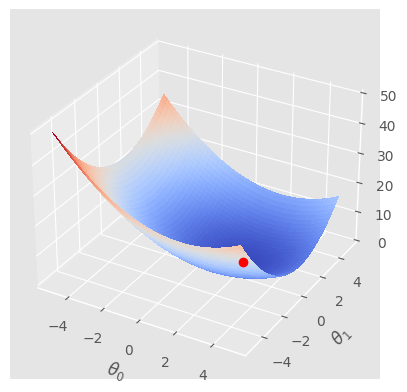

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(W0, W1, cost_vals, vmin=cost_vals.min() * 2, cmap=cm.coolwarm,
                       linewidth=0.5, antialiased=False)
#ax.set(xticklabels=[],
       #yticklabels=[],
       #zticklabels=[])

ax.set(xlabel=r'$\theta_0$', ylabel=r'$\theta_1$', zlabel='Z')
ax.plot(opt_theta_normal[0], opt_theta_normal[1], computeCost(X, y, opt_theta_normal)[0], marker='o', color='r')
plt.show()

<a list of 11 text.Text objects>

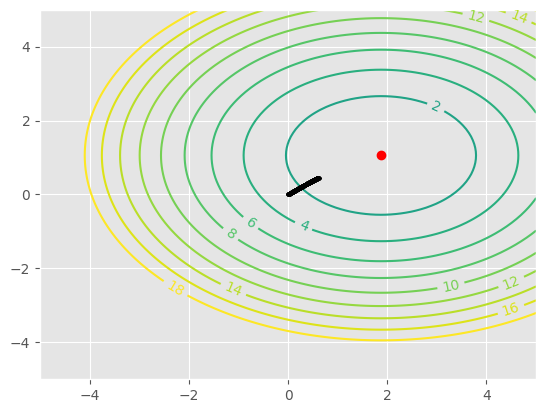

In [42]:
w = np.c_[theta_history]
fig2, ax2 = plt.subplots()

CS = ax2.contour(W0, W1, cost_vals, np.arange(-20, 20, 2))
ax2.plot(opt_theta_normal[0], opt_theta_normal[1], marker='o', color='r')
ax2.plot(w[:,0], w[:,1], 'kx-', markersize=2, mew=2)
plt.clabel(CS, inline=1, fontsize=10)

# Optional

This section will show you why feature normalization or standarztion are important in ML.

In [43]:
olympic_data = np.loadtxt('olympic.txt', delimiter=',')

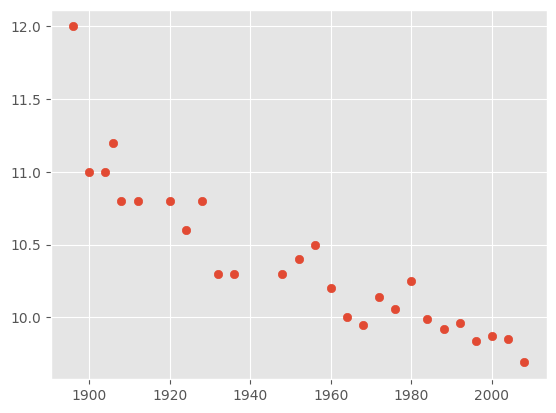

In [44]:
x_o = olympic_data[:,0]
y_o = olympic_data[:,1]
plt.scatter(x_o, y_o)

Using the the `computeCost` and `gradientDescent` find the optimal values for the 'olympic.txt' dataset

In [45]:
#Your code here
X_a = np.array([[1,i] for i in x_o ])
theta = np.zeros(X_a.shape[1])
eta = 0.2
num_iters = 400
opt_theta_GD, loss_history, theta_history = gradientDescent(X_a,y_o,theta,eta,num_iters)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\linalg\_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\HP\AppData\Local\Temp\ipykernel_13556\673701618.py:19: RuntimeWarning: overflow encountered in matmul
  grad = X.T@(X@theta - y)*1/n_sample #[YOUR CODE HERE]
C:\Users\HP\AppData\Local\Temp\ipykernel_13556\1344299056.py:21: RuntimeWarning: overflow encountered in matmul
  theta =  theta - ((eta/len(y))*X.T@(X@theta - y))  #[YOUR CODE HERE]
C:\Users\HP\AppData\Local\Temp\ipykernel_13556\1344299056.py:21: RuntimeWarning: invalid value encountered in subtract
  theta =  theta - ((eta/len(y))*X.T@(X@theta - y))  #[YOUR CODE HERE]


> You will get an eror when running gradient descend here, can you explain why?

Normalize the training set.
Here we use,
$$
x^{std}_i:=\frac{x_i-\mu}{\sigma}
$$

Construct the new design matrix with input $x^{std}_i$. You can use Numpy `mean` to compute average and `std` for the standard deviation

In [46]:
# COMPUTE THE STANDARDIZE INPUT
x_st = (x_o - np.mean(x_o))/np.std(x_o) #[YOUR CODE HERE]

In [47]:
#=========================
# COMPUTE THE DESIGN MATRIX
#==========================

X1 = np.array( [[1,i] for i in x_st])  #np.array([len(x_st)*[1],x_st]).T   #[YOUR CODE HERE]

Run the gradient descent implemented above on the new design matrix

In [48]:
theta1 = np.zeros(X1.shape[1])
opt_theta_GD, loss_history, theta_history = gradientDescent(X1, y_o, theta1, eta, num_iters)
# Check your result
print('Your result ', opt_theta_GD,'\t expected result is', np.array([10.38962963,-0.46667477]))

Your result  [10.38962963 -0.46667477] 	 expected result is [10.38962963 -0.46667477]
